## Erdos-Renyi-SC-Refined Rates Test 7: E-R CC vs E-R RSC

### Fill-up triangles to get clique complex and comparing results

In [1]:
import numpy as np
import matplotlib.pylab as plt
import random
from scipy.special import comb

import sys
sys.path.append('../src/')
sys.path.append('../scripts/')
from higher_order_structures import ErdosRenyiSC
from simulate_gillespie import *
from estimate_total_rates import *

## Setup

In [2]:
from higher_order_generators import get_p1_p2_for_target_degrees_precise
from generators_sc_test import check_full_triangle_property

In [3]:
N = 1000
d1, d2 = (12, 2)  # try 12, 2
g = ErdosRenyiSC(N, d1, d2)

In [4]:
g.print()

	Erdos-Renyi-SC on 1000 nodes with 6472 edges.



In [5]:
file_path = "../results/all_edges_ER"

# all_edges_ER = g.edges
# with open(file_path, "wb") as f:
#     pickle.dump(all_edges_ER, f)

with open(file_path, "rb") as f:
    all_edges_ER = pickle.load(f)

In [6]:
g.set_edges(all_edges_ER)
g.calculate_realized_properties()
g.summary()

	Target d1: 12.00, Realized d1: 11.96
	Target d2: 2.00, Realized d2: 1.99

	Target p1:  0.01201201, Realized p1: 0.01196797
	Target p2:  0.00000401, Realized p2: 0.00000398

	Initial p_G used for G(N, p_G): 0.00804817

	Realized number of pw edges:  5978/499500
	Realized number of ho edges:  662/166167000

	Is valid SC: True




In [7]:
edges_pw = g.get_edges(1)
edges_ho = g.get_edges(2)
is_CC = check_full_triangle_property(edges_pw, edges_ho)
print(is_CC)

Found an empty triangle: (2, 255, 710)
False


## Fill the triangles 

In [8]:
all_edges = g.edges
# convert to sorted tuples for lookup
edge_set = {tuple(sorted(edge)) for edge in all_edges if len(edge) == 2}
triangle_set = {tuple(sorted(triangle)) for triangle in all_edges if len(triangle) == 3}

# determine the node set 
all_nodes_in_edges = set(node for edge in edge_set for node in edge)
all_nodes_in_triangles = set(node for triangle in triangle_set for node in triangle)
all_nodes = all_nodes_in_edges.union(all_nodes_in_triangles)

## Iterate over sorted nodes
node_list = sorted(list(all_nodes))
node_list[:5], node_list[-5:]

([0, 1, 2, 3, 4], [995, 996, 997, 998, 999])

In [10]:
empty_triangles_found = []
# go over all possible 3-cliques based on node_list
for i_idx, node_i in enumerate(node_list):
    # consider j > i and k > j to avoid duplicates
    for j_idx in range(i_idx + 1, len(node_list)):
        node_j = node_list[j_idx]
        # check if edge {i, j} exists
        edge_ij = tuple(sorted((node_i, node_j)))
        if edge_ij not in edge_set:
            continue # not even a path i, j
        for k_idx in range(j_idx + 1, len(node_list)):
            node_k = node_list[k_idx]
            # check if unique triple forms a 3-clique
            edge_ik = tuple(sorted((node_i, node_k)))
            edge_jk = tuple(sorted((node_j, node_k)))
            # all pairwise edges exist
            is_3_clique = (edge_ij in edge_set and
                            edge_ik in edge_set and
                            edge_jk in edge_set)
            if is_3_clique:
                # now check if it is a "full triangle"
                potential_empty_triangle = tuple(sorted((node_i, node_j, node_k)))
                if potential_empty_triangle not in triangle_set:
                    empty_triangles_found.append(potential_empty_triangle)
empty_triangles_found[:5], len(empty_triangles_found)

([(2, 255, 710), (4, 70, 964), (6, 122, 486), (6, 367, 519), (6, 724, 807)],
 269)

In [9]:
g.set_edges(all_edges + empty_triangles_found)
edges_pw = g.get_edges(1)
edges_ho = g.get_edges(2)
is_CC = check_full_triangle_property(edges_pw, edges_ho)
print(is_CC)

True


In [10]:
g.calculate_realized_properties()
g.summary()

	Target d1: 12.00, Realized d1: 11.96
	Target d2: 2.00, Realized d2: 2.79

	Target p1:  0.01201201, Realized p1: 0.01196797
	Target p2:  0.00000401, Realized p2: 0.00000560

	Initial p_G used for G(N, p_G): 0.00804817

	Realized number of pw edges:  5978/499500
	Realized number of ho edges:  931/166167000

	Is valid SC: True




In [ ]:
g.d1_target
g.d2_realized
g.p1_target
g.p2_realized

# Test

In [29]:
test_name = "random_ER_CC"

I0 = 10
nsims = 100
run_gillespie_simulations = True
time_max = 20

# set beta1, beta2 such that k^* = .75 N
mu    = 1             # recovery rate

# TODO: 
# Try with 
# lambda_1 \in [1, 1.3, 1.5]
# lambda_2 \in [2, 5]
lambda1 = 1.2 # <- increase lambda
lambda2 = 4

beta1 = lambda1 * mu / g.d1_realized # pairwise infection rate
beta2 = lambda2 * mu / g.d2_realized # hyperedge contagion rate

# g.summary()

print(f"{test_name}: \n")
print(f"\tH = {g.name}, N = {N}, (d1, d2) = ({g.d1_realized:.2f}, {g.d2_realized:.2f}), I0 = {I0}, time_max = {time_max},")
g.print()

print(f"\tbeta1 * N = {beta1 * N:.2f}, beta2 * N^2 = {beta2 * (N**2):.2f}, mu = {mu},")
print(f"\twith estimation based on {nsims} Gillespie simulation runs\n")

random_ER_CC: 

	H = Erdos-Renyi-SC, N = 1000, (d1, d2) = (11.96, 1.99), I0 = 10, time_max = 20,
	Erdos-Renyi-SC on 1000 nodes with 6640 edges.

	beta1 * N = 100.37, beta2 * N^2 = 2014098.69, mu = 1,
	with estimation based on 100 Gillespie simulation runs



## Run Gillespie

exited on time=20.001863197214018, waiting_time=0.0028620523596097932
exited on time=20.001913475271138, waiting_time=0.00198555378802036
exited on time=20.002126145255883, waiting_time=0.003547178574780443
break: total_infected == 0: 0, time=2.8188176422289275
exited on time=20.00178171849858, waiting_time=0.0018411405388725267
exited on time=20.000503265147582, waiting_time=0.0012037205688442253
exited on time=20.000446792614156, waiting_time=0.0005663119761823631
exited on time=20.00020942483533, waiting_time=0.0008962695668639355
exited on time=20.000190634710254, waiting_time=0.00026799371202714526
Run 10/100 ...
exited on time=20.000989344507325, waiting_time=0.0012887270838212396
exited on time=20.00026476099636, waiting_time=0.0010617428224784587
exited on time=20.000140666176673, waiting_time=0.0009254566286538109
exited on time=20.000556183507545, waiting_time=0.0010643722691526013
exited on time=20.001235673770044, waiting_time=0.0012489108835836568
break: total_infected == 

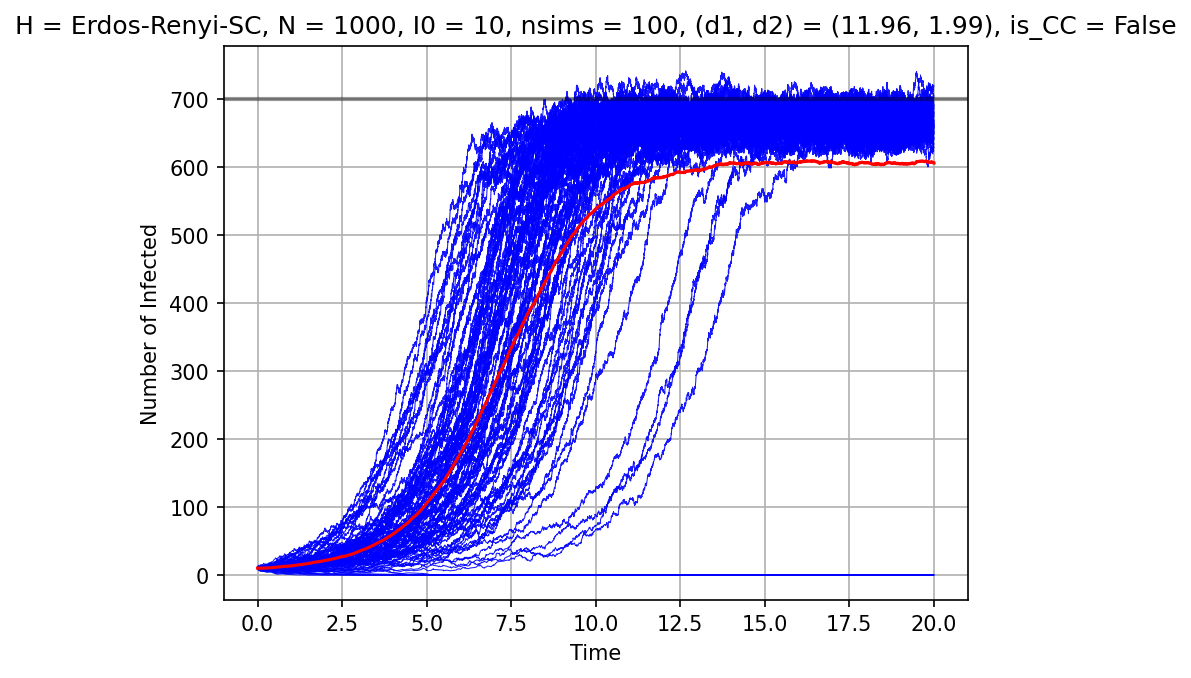

In [30]:
## --- Run Gillespie ---
run_gillespie_simulations = True

I0_gillespie = I0 # TODO: go over the range when necessary
nodes = list(g.nodes.keys())
initial_infections = random.sample(nodes, I0)

if run_gillespie_simulations: 
    X_sims = []
    for i in range(nsims):
        if (i + 1) % (nsims // 10 or 1) == 0:
            print(f"\nRun {i + 1}/{nsims} ...")

        X_t = gillespie_sim(g, beta1, beta2, mu, initial_infections, time_max)
        X_sims.append(X_t)

    # save the simulation results
    sim_results = {f'sim_{i}': X_sims[i] for i in range(nsims)}
    np.savez_compressed(f'../results/gillespie-sims_{test_name}_I0={I0}_is_CC={is_CC}.npz', **sim_results)
else: 
    # load simulation results
    sim_results = np.load(f'../results/gillespie-sims_{test_name}_I0={I0}_is_CC={is_CC}.npz', allow_pickle=True)
    X_sims = [sim_results[f'sim_{i}'] for i in range(nsims)]

# plot X_t curves in gray and average curve in red
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

plt.axhline(y=int(0.7 * N), color='black', lw=2, alpha=0.4, linestyle='-')

avg_curve, times = get_average(X_sims, time_max, len(X_sims), delta_t = 0.01)
plt.plot(times, avg_curve, "red")

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, I0 = {I0}, nsims = {nsims}, (d1, d2) = ({g.d1_realized:.2f}, {g.d2_realized:.2f}), is_CC = {is_CC}")
plt.savefig(f"../figures/estimation/{test_name}/gillespie-sims-I0=10_is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig) # free up memory

## Burn-in / alignment approach

In [31]:
def align_trajectories(X_sims, k_threshold, new_time_max):
    X_sims_aligned = []

    for i, X_t in enumerate(X_sims):
        times_orig = X_t[0, :].astype(float)
        infected_orig = X_t[2, :].astype(int)
        above_threshold_indices = np.where(infected_orig >= k_threshold)[0]
        if len(above_threshold_indices) > 0:
            # outbreak reached the threshold
            start_index = above_threshold_indices[0]
            start_time = times_orig[start_index]

            times_shifted = times_orig[start_index:] - start_time
            end_indices = np.where(times_shifted > new_time_max)[0]

            if len(end_indices) > 0:
                end_index = start_index + end_indices[0]
            else:
                # skip it
                print("Run ended before start_time + new_time_max")
            X_t_aligned = X_t[:, start_index:end_index].copy()

            # update times in X_t to times_shifted
            X_t_aligned[0, :] = times_shifted[:len(X_t_aligned[0,:])]
            X_sims_aligned.append(X_t_aligned)
    
    print(f"Aligned {len(X_sims_aligned)}/{len(X_sims)} trajectories.")
    return X_sims_aligned

In [32]:
k_threshold = 100
new_time_max = 10

X_sims_aligned = align_trajectories(X_sims, k_threshold, new_time_max)

Run ended before start_time + new_time_max
Run ended before start_time + new_time_max
Run ended before start_time + new_time_max
Aligned 91/100 trajectories.


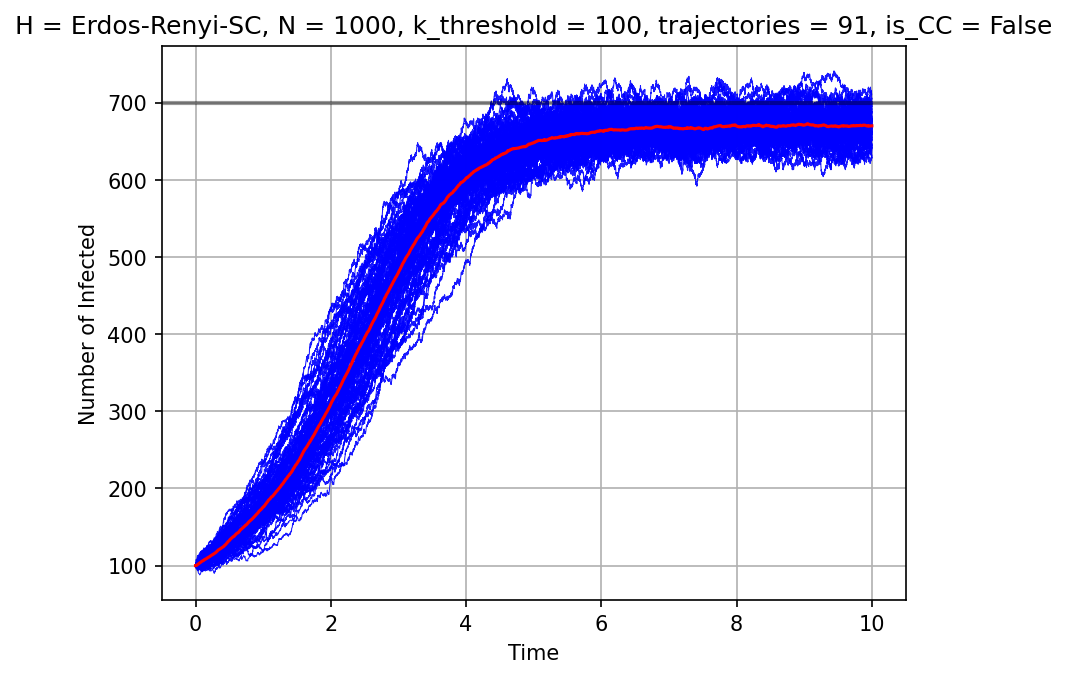

In [33]:
# plot X_t curves in gray and average curve in red
fig = plt.figure(dpi=150) # set DPI
ax  = plt.subplot()

for X_t in X_sims_aligned:
    ax.plot(X_t[0], X_t[2], c="blue", alpha=0.9, linewidth=0.5, rasterized=True)

avg_curve, times = get_average(X_sims_aligned, new_time_max, len(X_sims_aligned), delta_t = 0.01)

plt.plot(times, avg_curve, "red")

plt.axhline(y=int(0.7 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, k_threshold = {k_threshold}, trajectories = {len(X_sims_aligned)}, is_CC = {is_CC}")
plt.savefig(f"../figures/estimation/{test_name}/gillespie-sims-aligned_I0=10is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig) # free up memory

## Solve KEs and compare

In [34]:
g.d1_realized, g.d2_realized

(np.float64(11.956), np.float64(1.986))

In [35]:
I0 = 100

# solve KEs and compare
all_states = list(range(N + 1))
M = len(all_states)
# ode_system_complete = list_all_ODEs_complete(g, beta1, beta2, mu)
ode_system_random = list_all_ODEs_random(g, beta1, beta2, mu, g.p1_realized, g.p2_realized)

# set the initial condition
p0 = np.zeros(M)
i_set0 = all_states.index(I0)
p0[i_set0] = 1.0 # all other states have prob 0 at time 0
# p0

In [36]:
# solve ode_system_random over time
t_span = (0.0, new_time_max)

# times t_i to evaluate in, get saved in sol.t
steps_eval = 202
t_eval = np.linspace(t_span[0], t_span[1], steps_eval)

def f_ode(t, p):
    return ode_system_random(t, p)

sol = solve_ivp(f_ode, 
                t_span, 
                p0, 
                t_eval=t_eval,
                method="LSODA")

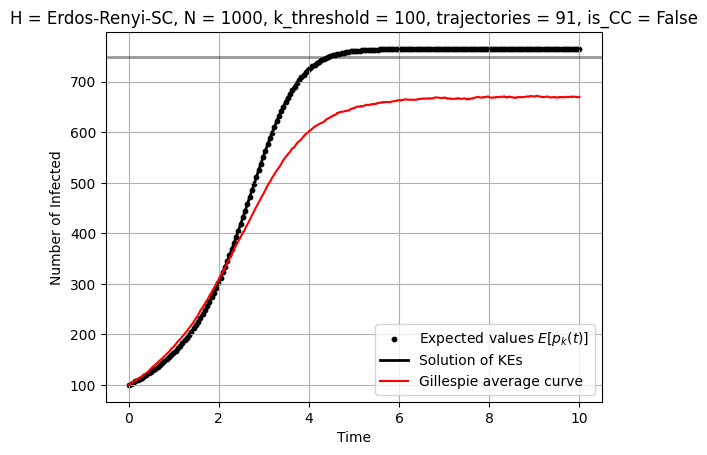

In [37]:
# plot both the expected values of p_{k}(t) 
# and the Gillespie average curve
# on the same figure

expected_values = calculate_expected_values(sol)

plt.figure()
plt.scatter(sol.t, expected_values, s = 10, color="k", 
            label=r"Expected values $E[p_{k}(t)]$")
plt.plot(sol.t, expected_values, lw=2, color="k", label="Solution of KEs")
plt.plot(times, avg_curve, 'red', label="Gillespie average curve")

plt.axhline(y=int(0.75 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.legend()
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, k_threshold = {k_threshold}, trajectories = {len(X_sims_aligned)}, is_CC = {is_CC}")
plt.savefig(f"../figures/estimation/{test_name}/solution-vs-gillepsie_I0=10_is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

## Calculate the estimates

In [38]:
## --- Calculate the estimates ---
min_Tk_threshold = 1e-6
estimates = calculate_estimates(X_sims_aligned, N, min_Tk_threshold)

Total events processed: 1009837


In [39]:
np.nanmean(estimates["a_k_hat"], axis=0)

np.float64(149.8817132991302)

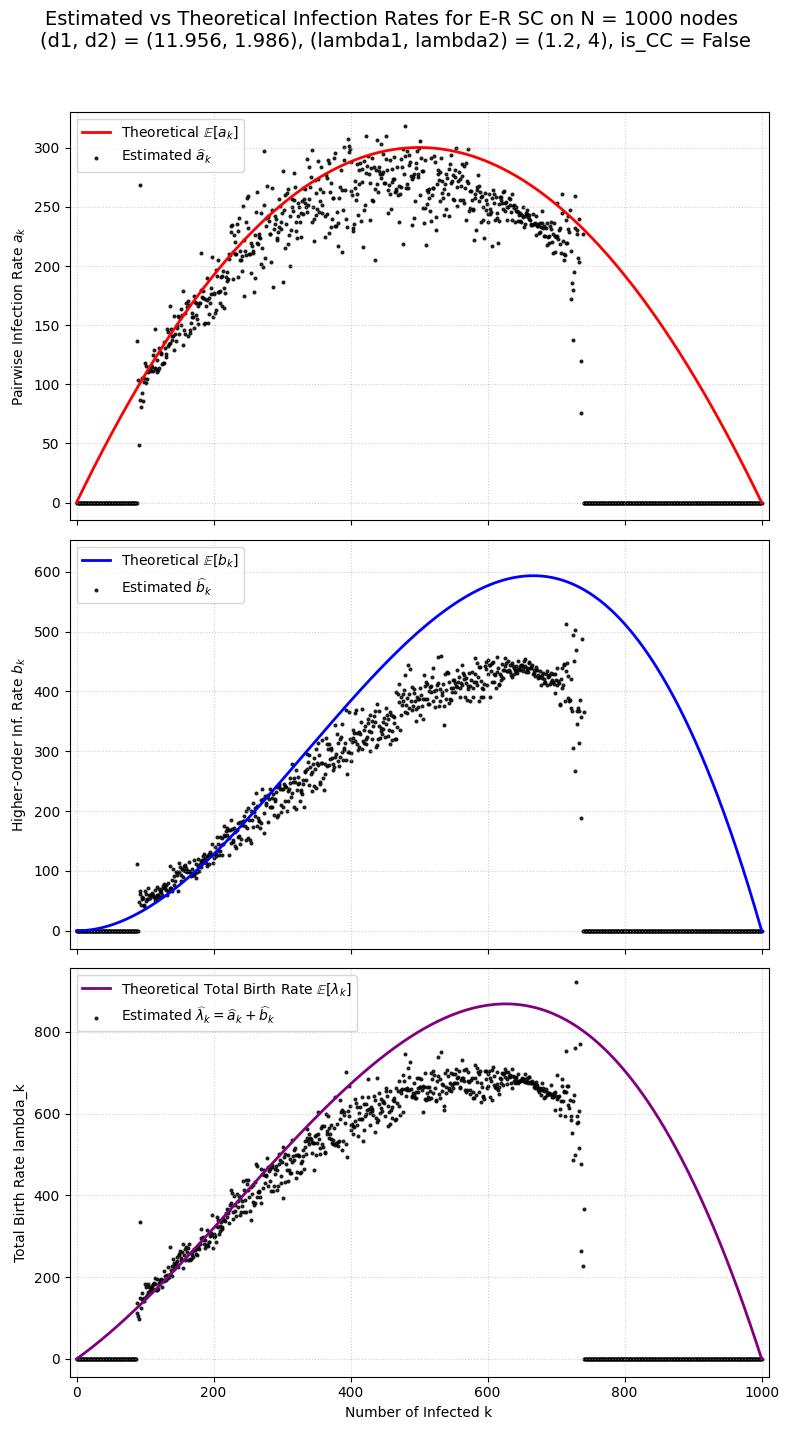

In [40]:
ak_hat_point_estimates = estimates["a_k_hat"]
bk_hat_point_estimates = estimates["b_k_hat"]
lambda_k_hat_point_estimates = estimates["lambda_k_hat"]

plot_valid_k_idx = ~np.isnan(ak_hat_point_estimates)

# theoretical (expected) rates for ER-SC
k_values = np.arange(N + 1)
k_choose_2 = np.array([comb(k, 2, exact=True) if k >= 2 else 0 for k in k_values], dtype=float)
a_k_theoretical = beta1 * g.p1_realized * k_values * (N - k_values)
b_k_theoretical = beta2 * g.p2_realized * k_choose_2 * (N - k_values)
total_birth_k_theoretical = a_k_theoretical + b_k_theoretical

fig, axes = plt.subplots(3, 1, figsize=(8, 15), sharex=True)
title = f"Estimated vs Theoretical Infection Rates for E-R SC on N = {N} nodes \n"
title += f"(d1, d2) = ({g.d1_realized}, {g.d2_realized}), (lambda1, lambda2) = ({lambda1}, {lambda2}), is_CC = {is_CC}"
fig.suptitle(title, fontsize=14)

# PW rates a_k
axes[0].plot(k_values, a_k_theoretical, color="red", linestyle='-', linewidth=2,
             label=r'Theoretical $\mathbb{E}[a_k]$')
axes[0].scatter(k_values[plot_valid_k_idx], ak_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{a}_k$')
axes[0].set_ylabel("Pairwise Infection Rate $a_k$")
axes[0].legend(loc='upper left')
axes[0].grid(True, linestyle=':', alpha=0.6)

min_y_ak = np.nanmin(ak_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_ak_theory = np.nanmax(a_k_theoretical)
axes[0].set_ylim(bottom=min(0, min_y_ak) - 0.05 * max_y_ak_theory,
                 top=max_y_ak_theory * 1.1 if max_y_ak_theory > 0 else 0.1)


# HO rates b_k
axes[1].plot(k_values, b_k_theoretical, color="blue", linestyle='-', linewidth=2,
             label=r'Theoretical $\mathbb{E}[b_k]$')
axes[1].scatter(k_values[plot_valid_k_idx], bk_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{b}_k$')
axes[1].set_ylabel("Higher-Order Inf. Rate $b_k$")
axes[1].legend(loc='upper left')
axes[1].grid(True, linestyle=':', alpha=0.6)
min_y_bk = np.nanmin(bk_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_bk_theory = np.nanmax(b_k_theoretical)
axes[1].set_ylim(bottom=min(0, min_y_bk) - 0.05 * max_y_bk_theory,
                 top=max_y_bk_theory * 1.1 if max_y_bk_theory > 0 else 0.1)


# total birth rates lambda_k = a_k + b_k
axes[2].plot(k_values, total_birth_k_theoretical, color="purple", linestyle='-', linewidth=2,
             label=r'Theoretical Total Birth Rate $\mathbb{E}[\lambda_k]$')
axes[2].scatter(k_values[plot_valid_k_idx], lambda_k_hat_point_estimates[plot_valid_k_idx],
                color="black", marker='.', s=15, alpha=0.8,
                label=r'Estimated $\widehat{\lambda}_k = \widehat{a}_k + \widehat{b}_k$')
axes[2].set_ylabel("Total Birth Rate lambda_k")
axes[2].legend(loc='upper left')
axes[2].grid(True, linestyle=':', alpha=0.6)
min_y_lk = np.nanmin(lambda_k_hat_point_estimates[plot_valid_k_idx]) if np.any(plot_valid_k_idx) else 0
max_y_lk_theory = np.nanmax(total_birth_k_theoretical)
axes[2].set_ylim(bottom=min(0, min_y_lk) - 0.05 * max_y_lk_theory,
                 top=max_y_lk_theory * 1.1 if max_y_lk_theory > 0 else 0.1)


axes[2].set_xlabel("Number of Infected k")
for ax_item in axes:
    ax_item.set_xlim(left=-N*0.01, right=N*1.01)

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig(f"../figures/estimation/{test_name}/supporting_fig_ER_SC-CC_rates_is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()
plt.close(fig)

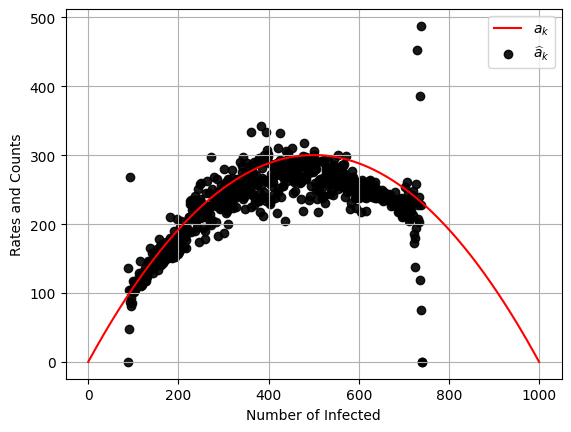

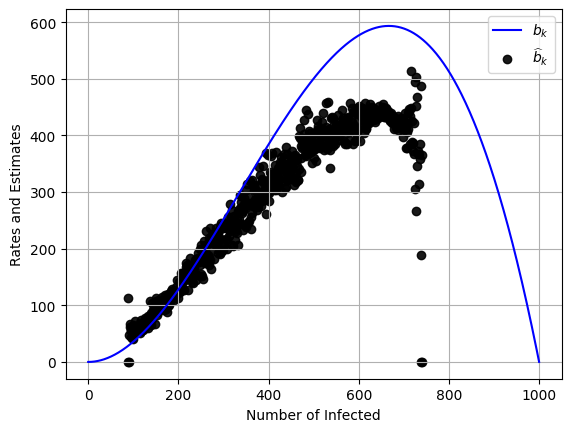

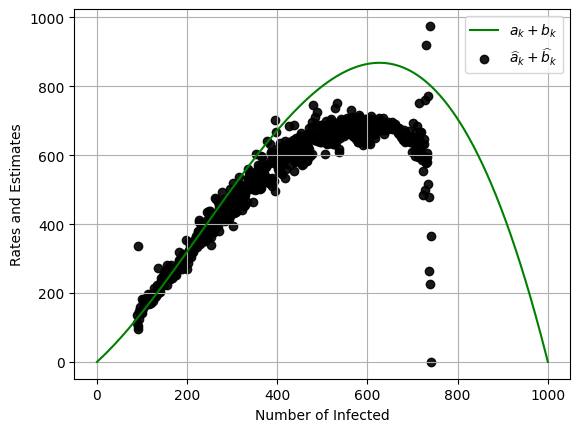

In [41]:
a_k_hat = estimates["a_k_hat"]
b_k_hat = estimates["b_k_hat"]
c_k_hat = estimates["c_k_hat"]

# plot only where T_k was non-zero!
valid_k_idx = estimates["T_k"] > min_Tk_threshold   

# and compare them to theoretical rates
k_values = np.arange(0, N + 1) # number of infected from 0 to N
k_choose_2 = np.array(list(map(lambda k: comb(k, 2, exact=True), k_values)))

# TODO: what are theoretical rates now?
a_k = g.p1_realized * beta1 * k_values * (N - k_values)
b_k = g.p2_realized * beta2 * k_choose_2 * (N - k_values)

# TODO: replace c_k with sum lambda_k = birth_rate_k = a_k + b_k
c_k = mu * k_values

fig = plt.figure()
ax = plt.subplot()

# theoretical ak vs. ak hats 
ax.plot(k_values, a_k, label=r'$a_k$', color="red")
ax.scatter(k_values[valid_k_idx], a_k_hat[valid_k_idx],
        label=r'$\widehat{a}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Counts")
plt.legend()
plt.grid(True)    
plt.savefig(f"../figures/estimation/{test_name}/estimates_ak_is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')    
plt.show()

# theoretical bk vs. bk hats
fig = plt.figure()
ax = plt.subplot()
ax.plot(k_values, b_k, label=r'$b_k$', color="blue")
ax.scatter(k_values[valid_k_idx], b_k_hat[valid_k_idx],
        label=r'$\widehat{b}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Estimates")
plt.legend()
plt.grid(True)    
plt.savefig(f"../figures/estimation/{test_name}/estimates_bk_is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

# theoretical ck vs. ck hats (as a test only)
fig = plt.figure()
ax = plt.subplot()
ax.plot(k_values, a_k + b_k, label=r'$a_k + b_k$', color="green")
ax.scatter(k_values[valid_k_idx], a_k_hat[valid_k_idx] + b_k_hat[valid_k_idx],
        label=r'$\widehat{a}_k + \widehat{b}_k$', color="black", alpha=0.9)
plt.xlabel("Number of Infected")
plt.ylabel("Rates and Estimates")
plt.legend()
plt.grid(True)
plt.savefig(f"../figures/estimation/{test_name}/estimates_ck_is_CC={is_CC}.pdf", 
            format='pdf', bbox_inches='tight')
plt.show()

## Solve KEs using the estimates

In [ ]:
## --- Solve KEs using the estimates and compare ---
# --- Model 2 ---
ode_system = list_all_ODEs_using_estimates(g, a_k_hat, b_k_hat, mu)

def f_ode(t, p):
    return ode_system(t, p)

all_states = list(range(N + 1))
M = len(all_states)
I0 = 100
p0 = np.zeros(M)
i_set0 = all_states.index(I0)
p0[i_set0] = 1.0 # all other states have prob 0 at time 0

sol_hat = solve_ivp(f_ode, 
                    t_span, 
                    p0, 
                    t_eval=t_eval,
                    method="LSODA")

expected_values_hat = calculate_expected_values(sol_hat)

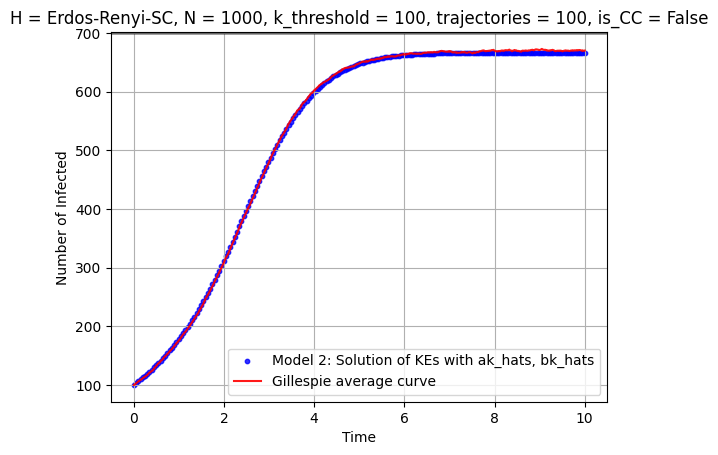

In [43]:
plt.figure()

# plt.plot(sol.t, expected_values_hat, color="b", label="Model 2: Solution of KEs with ak_hats, bk_hats")
plt.scatter(sol_hat.t, expected_values_hat, color="b", s=10, alpha=.8, label="Model 2: Solution of KEs with ak_hats, bk_hats")

plt.plot(times, avg_curve, 'red', label="Gillespie average curve", alpha=0.9)

plt.axhline(y=int(0.7 * N), color='black', lw=2, alpha=0.4, linestyle='-')

plt.xlabel("Time")
plt.ylabel("Number of Infected")
plt.legend()
plt.grid(True)
plt.title(f"H = {g.name}, N = {N}, k_threshold = {k_threshold}, trajectories = {len(X_sims)}, is_CC = {is_CC}")
plt.savefig(f"../figures/estimation/{test_name}/solutions-comparison_is_CC={is_CC}.pdf",
            format='pdf', bbox_inches='tight')
plt.show()